In [1]:
import sys
sys.path.append("../../..")

import helper as hlp
import pandas as pd
import numpy as np

[nltk_data] Downloading package stopwords to C:\Users\Abdul
[nltk_data]     Manaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
EPOCHS = 50
MAX_LEN = 30
N_CLASSES = 5
BATCH_SIZE = 128
LEARNING_RATE = 2e-5
NAME = 'mBert(bert)-english'
MODEL_NAME = 'bert-base-multilingual-uncased'
dir = '../../../../Dataset Statistics/dataset'
path = f'../saved_models/{NAME}'
class_names = ['Disability', 'Gender/Sexual', 'Origin/Nationality', 'Race/Ethnicity', 'Religion']

In [3]:
train_df = pd.read_csv(f'{dir}/train.csv')
val_df = pd.read_csv(f'{dir}/val.csv')
test_df = pd.read_csv(f'{dir}/test.csv')

train_df = train_df[train_df['class'] != 0]
val_df = val_df[val_df['class'] != 0]
test_df = test_df[test_df['class'] != 0]

train_texts = train_df['english_text'].values
val_texts = val_df['english_text'].values
test_texts = test_df['english_text'].values

train_labels = train_df[class_names].values
val_labels = val_df[class_names].values
test_labels = test_df[class_names].values

In [7]:
test_labels.shape[1]

5

In [4]:
#show 5 values along with their labels
for i in range(5):
    print(train_texts[i], train_labels[i])

who you know make waves ina low tide?  dbo’d yo bitch now she both of ours , nigga [0 0 0 1 0]
That bitch look perfect https://t.co/L17zFSuqGQ [0 1 0 0 0]
We on all platforms now, so next time you vibing with a bad bitch, a beautiful woman, whatever you prefer. Play that FIHTEEN so she can know you different [0 1 0 0 0]
just got a haircut, anybody could take me from my bitch rn [0 1 0 0 0]
@barnlife5 @realShawNshawN @grantstern If y'all fucking feel that way then do it lol.  Trump has the balls to do what democrats wish they can do.  But liberals and democrats are soft and scared to be cancelled or they don't bow down to the far left!! 😂😂Y'all are dumb as fuck it's hilarious [0 0 0 1 0]


In [5]:
#show 5 values along with their labels
for i in range(5):
    print(hlp.preprocess_text(train_texts[i], language="urdu")
    , train_labels[i])

who you know make waves ina low tide dbo’d yo bitch now she both of ours nigga [0 0 0 1 0]
that bitch look perfect [0 1 0 0 0]
we on all platforms now so next time you vibing with a bad bitch a beautiful woman whatever you prefer play that fihteen so she can know you different [0 1 0 0 0]
just got a haircut anybody could take me from my bitch rn [0 1 0 0 0]
barnlife5 realshawnshawn grantstern if yall fucking feel that way then do it lol trump has the balls to do what democrats wish they can do but liberals and democrats are soft and scared to be cancelled or they dont bow down to the far left 😂😂yall are dumb as fuck its hilarious [0 0 0 1 0]


In [6]:
## apply preprocessing to all texts
train_texts = [hlp.preprocess_text(text) for text in train_texts]
val_texts = [hlp.preprocess_text(text) for text in val_texts]
test_texts = [hlp.preprocess_text(text) for text in test_texts]

In [7]:
## mbert model and tokenizer
import torch
from transformers import BertTokenizer, BertForSequenceClassification

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)
model = BertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model = model.to(device)

c:\Users\Abdul Manaf\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\utils\_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
train_data_loader = hlp.create_data_loader(train_texts, train_labels, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = hlp.create_data_loader(val_texts, val_labels, tokenizer, MAX_LEN, BATCH_SIZE)

history = hlp.train_model_multi(train_data_loader, val_data_loader, model, optimizer, device, EPOCHS, tokenizer, path)

Epoch 0/50
----------


Training Progress: 100%|██████████| 241/241 [01:25<00:00,  2.82it/s, loss=0.0356]


Train loss 0.1358477992635545 accuracy 0.8618010403120936
Validation loss 0.05642114163456875 accuracy 0.9432416617905208
Model and tokenizer saved at epoch 0
Checkpoint saved: Improved validation accuracy at epoch 0: 0.9432416617905208
Epoch 1/50
----------


Training Progress: 100%|██████████| 241/241 [01:26<00:00,  2.77it/s, loss=0.014] 


Train loss 0.04471798791816744 accuracy 0.9530884265279583
Validation loss 0.04222856923063964 accuracy 0.9566998244587478
Model and tokenizer saved at epoch 1
Checkpoint saved: Improved validation accuracy at epoch 1: 0.9566998244587478
Epoch 2/50
----------


Training Progress: 100%|██████████| 241/241 [01:25<00:00,  2.80it/s, loss=0.00914]


Train loss 0.030957226846289834 accuracy 0.9685630689206762
Validation loss 0.045009368685660536 accuracy 0.9603081724205188
Model and tokenizer saved at epoch 2
Checkpoint saved: Improved validation accuracy at epoch 2: 0.9603081724205188
Epoch 3/50
----------


Training Progress: 100%|██████████| 241/241 [01:24<00:00,  2.84it/s, loss=0.00465]


Train loss 0.02361385523113596 accuracy 0.9773407022106632
Validation loss 0.04589427753213655 accuracy 0.9634289057928613
Model and tokenizer saved at epoch 3
Checkpoint saved: Improved validation accuracy at epoch 3: 0.9634289057928613
Epoch 4/50
----------


Training Progress: 100%|██████████| 241/241 [01:25<00:00,  2.82it/s, loss=0.00333]


Train loss 0.017885890978686047 accuracy 0.9841677503250975
Validation loss 0.04843837001222979 accuracy 0.96255119953189
No improvement in validation accuracy for 1 epochs.
Epoch 5/50
----------


Training Progress: 100%|██████████| 241/241 [01:25<00:00,  2.82it/s, loss=0.00347]


Train loss 0.014335399292625827 accuracy 0.9871911573472042
Validation loss 0.0478735818947309 accuracy 0.9641115662180613
Model and tokenizer saved at epoch 5
Checkpoint saved: Improved validation accuracy at epoch 5: 0.9641115662180613
Epoch 6/50
----------


Training Progress: 100%|██████████| 241/241 [01:25<00:00,  2.83it/s, loss=0.00246]


Train loss 0.012121688742654329 accuracy 0.9893042912873862
Validation loss 0.047214946933780554 accuracy 0.9638189974644041
No improvement in validation accuracy for 1 epochs.
Epoch 7/50
----------


Training Progress: 100%|██████████| 241/241 [01:25<00:00,  2.81it/s, loss=0.00222]


Train loss 0.01051312820556964 accuracy 0.9907672301690507
Validation loss 0.04792682850089522 accuracy 0.9639165203822898
No improvement in validation accuracy for 2 epochs.
Epoch 8/50
----------


Training Progress: 100%|██████████| 241/241 [01:25<00:00,  2.81it/s, loss=0.00145]


Train loss 0.009208700622053222 accuracy 0.9917425227568271
Validation loss 0.04781146796081031 accuracy 0.9624536766140043
No improvement in validation accuracy for 3 epochs.
Epoch 9/50
----------


Training Progress: 100%|██████████| 241/241 [01:26<00:00,  2.79it/s, loss=0.00132]


Train loss 0.007568904225273962 accuracy 0.9930429128738621
Validation loss 0.056008170417762924 accuracy 0.9642090891359469
Model and tokenizer saved at epoch 9
Checkpoint saved: Improved validation accuracy at epoch 9: 0.9642090891359469
Epoch 10/50
----------


Training Progress: 100%|██████████| 241/241 [01:26<00:00,  2.80it/s, loss=0.0012] 


Train loss 0.007053629540610301 accuracy 0.9936931079323797
Validation loss 0.0538875030103588 accuracy 0.9573824848839477
No improvement in validation accuracy for 1 epochs.
Epoch 11/50
----------


Training Progress: 100%|██████████| 241/241 [01:26<00:00,  2.78it/s, loss=0.00113] 


Train loss 0.005925079285943904 accuracy 0.9950260078023407
Validation loss 0.05968170288093618 accuracy 0.9613809245172615
No improvement in validation accuracy for 2 epochs.
Epoch 12/50
----------


Training Progress: 100%|██████████| 241/241 [01:25<00:00,  2.83it/s, loss=0.000853]


Train loss 0.0050960825543649715 accuracy 0.9955136540962288
Validation loss 0.05922643326289009 accuracy 0.9618685391066901
No improvement in validation accuracy for 3 epochs.
Epoch 13/50
----------


Training Progress: 100%|██████████| 241/241 [01:25<00:00,  2.82it/s, loss=0.000757]


Train loss 0.004832132517300252 accuracy 0.9954161248374512
Validation loss 0.05629776250987808 accuracy 0.9637214745465185
No improvement in validation accuracy for 4 epochs.
Epoch 14/50
----------


Training Progress: 100%|██████████| 241/241 [01:25<00:00,  2.82it/s, loss=0.000578]


Train loss 0.0040695983803004055 accuracy 0.9961638491547464
Validation loss 0.0597587221454438 accuracy 0.9631363370392042
No improvement in validation accuracy for 5 epochs.
Stopping early due to lack of improvement in validation accuracy.


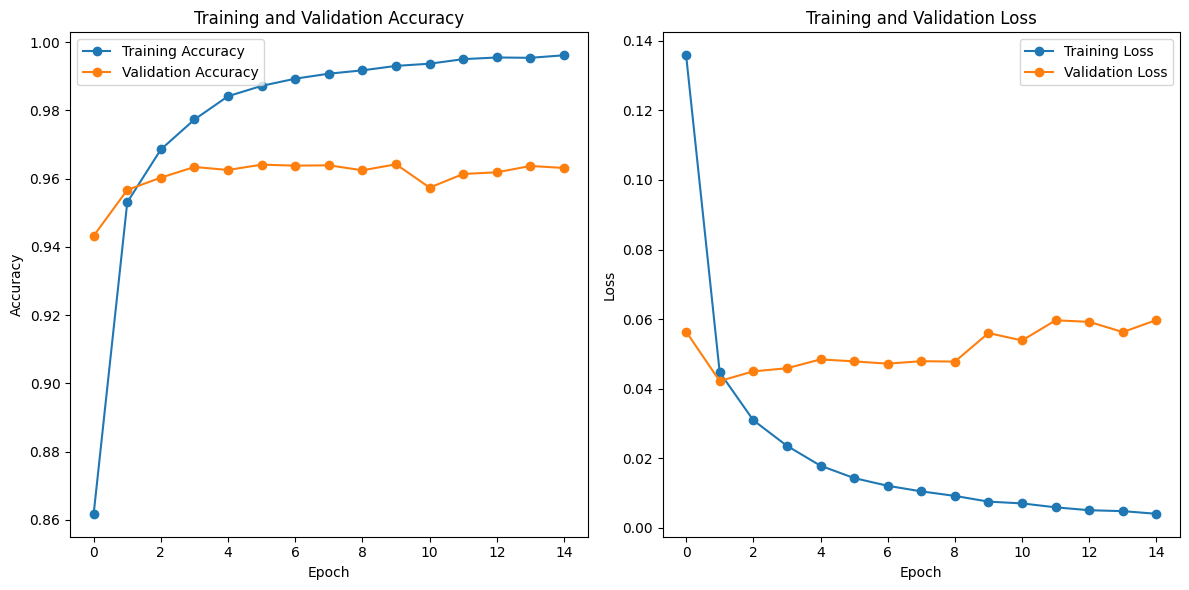

In [9]:
hlp.plot_history(history)

In [8]:
test_data_loader = hlp.create_data_loader(test_texts, test_labels, tokenizer, MAX_LEN, BATCH_SIZE)

test_acc, test_loss, test_label_actual, test_label_pred = hlp.eval_model_multi(model, test_data_loader, device)

print(f'Test Accuracy: {test_acc:.2f} Test Loss: {test_loss}')

Test Accuracy: 0.97 Test Loss: 0.05247716536820165


In [7]:
## mbert model and tokenizer
import torch
from transformers import BertTokenizer, BertForSequenceClassification

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
MODEL_NAME = 'G:\My Drive\Hate Speech_Multilingual\Code\Model training\Fine_Grained_Task\Cutom Models\saved_models\mBert(bert)-english'
tokenizer = BertTokenizer.from_pretrained(f'{MODEL_NAME}\\tokenizer')
model = BertForSequenceClassification.from_pretrained(f'{MODEL_NAME}\model_epoch_9', num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model = model.to(device)

c:\Users\Abdul Manaf\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\utils\_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(


Accuracy: 0.97
F1 Score: 0.97
Precision: 0.97
Recall: 0.97

Classification Report:
                    precision    recall  f1-score   support

        Disability       0.68      0.45      0.54       105
     Gender/Sexual       0.95      0.98      0.97      3358
Origin/Nationality       0.74      0.79      0.76       124
    Race/Ethnicity       0.99      0.95      0.97      3559
          Religion       0.97      0.99      0.98      3108

          accuracy                           0.97     10254
         macro avg       0.87      0.83      0.84     10254
      weighted avg       0.97      0.97      0.97     10254



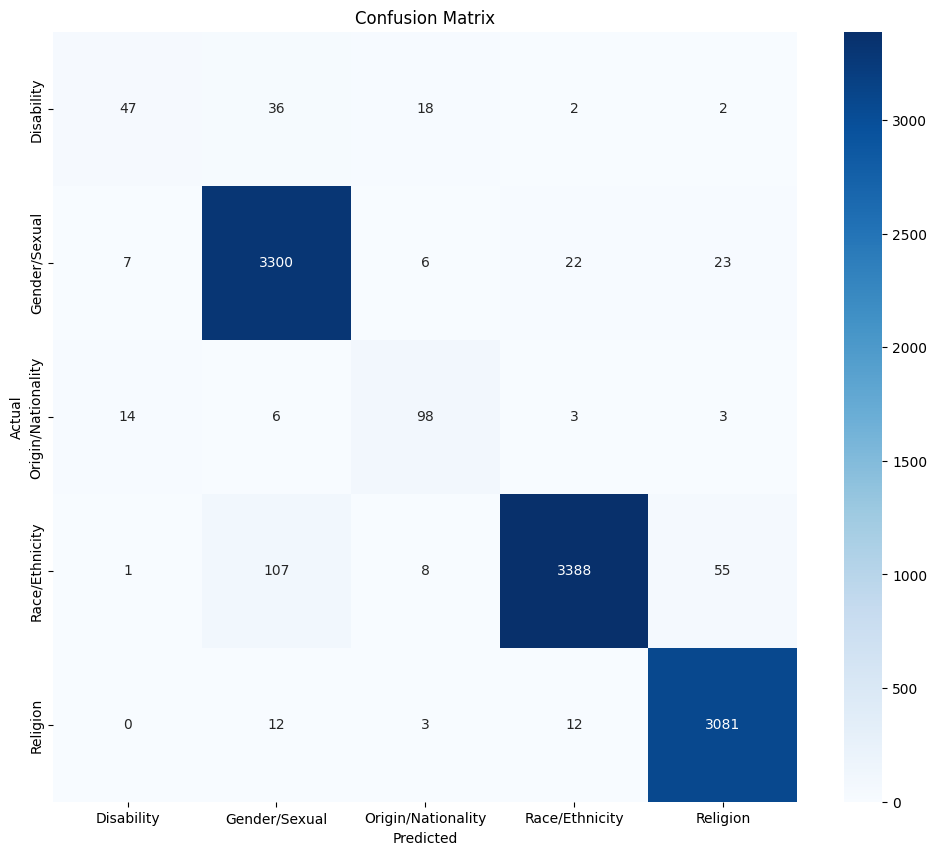

In [9]:
hlp.plot_confusion_matrix(np.argmax(test_label_actual, axis=1), np.argmax(test_label_pred, axis=1), class_names)

In [47]:
test_texts = ["This is the sort of thing that happens in a shithole country. @URL"]
preds, confidence = hlp.predict(test_texts, model, tokenizer, MAX_LEN, device)

index = list(confidence[0]).index(np.array(confidence[0]).max())

print(f"The predicted class is: {class_names[index]} with confidence: {confidence[0][index]:.2f}")

The predicted class is: Origin/Nationality with confidence: 1.00


In [43]:
test_texts = ["Muslims are pathetic they are not humans fuck"]
preds, confidence = hlp.predict(test_texts, model, tokenizer, MAX_LEN, device)

index = list(confidence[0]).index(np.array(confidence[0]).max())

print(f"The predicted class is: {class_names[index]} with confidence: {confidence[0][index]:.2f}")

The predicted class is: Religion with confidence: 1.00
